# K-means: California housing

In [1]:
# Handle imports up-front
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix


## 1. Data loading
### 1.1. Load

In [2]:
raw_data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

### 1.2. Inspect

In [3]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
print(raw_data_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
print(raw_data_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

### 1.3. Remove unnecessary features

In [6]:
data_df=raw_data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


### 1.4. Test-train split

In [7]:
# Your code here...

## 2. EDA
### 2.1. Missing, and/or extreme values

In [8]:
# Your code here...
print(data_df.isnull().sum())

# The dataset is pretty clean already, and we only have three features - but it never hurts to plot a few histograms to take a look at the shape of the data

MedInc       0
Latitude     0
Longitude    0
dtype: int64


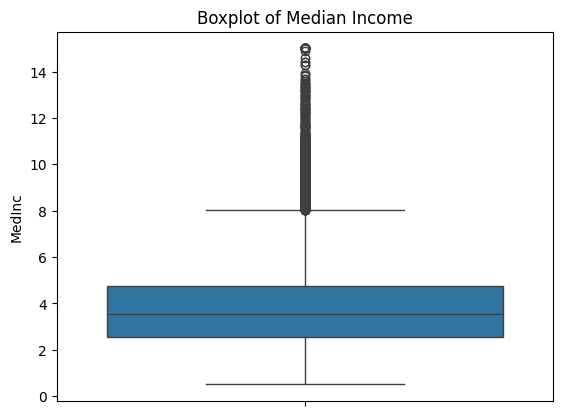

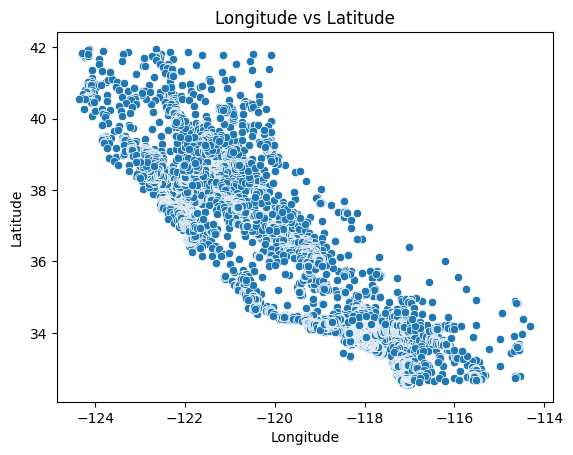

In [9]:
sns.boxplot(data_df['MedInc'])
plt.title('Boxplot of Median Income')
plt.show()

sns.scatterplot(x=data_df['Longitude'], y=data_df['Latitude'])
plt.title('Longitude vs Latitude')
plt.show()

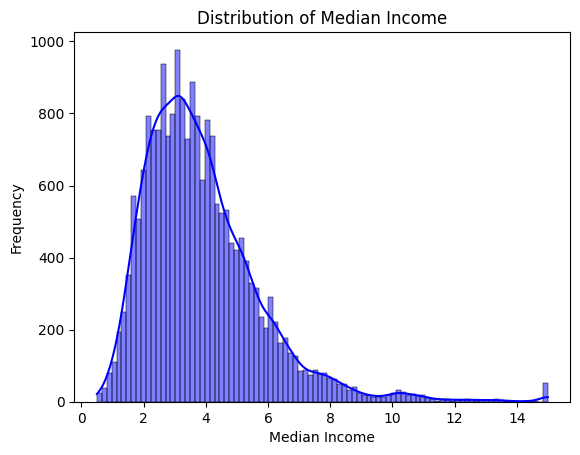

In [10]:
sns.histplot(data_df['MedInc'], kde=True, color='blue')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

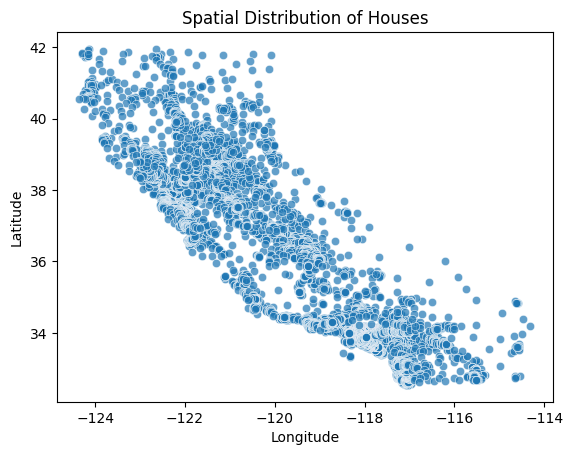

In [11]:
sns.scatterplot(x=data_df['Longitude'], y=data_df['Latitude'], alpha=0.7)
plt.title('Spatial Distribution of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

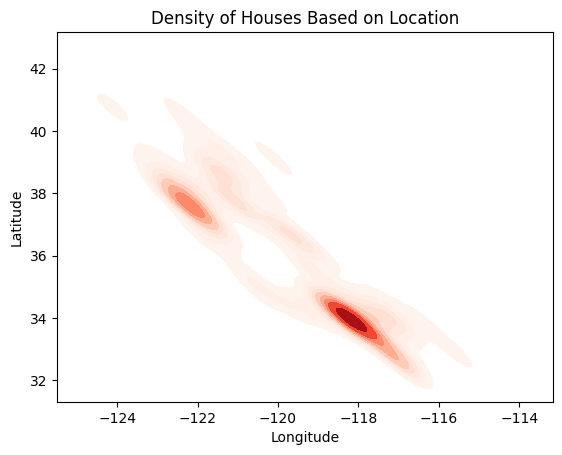

In [12]:
sns.kdeplot(x=data_df['Longitude'], y=data_df['Latitude'], cmap="Reds", fill=True)
plt.title('Density of Houses Based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

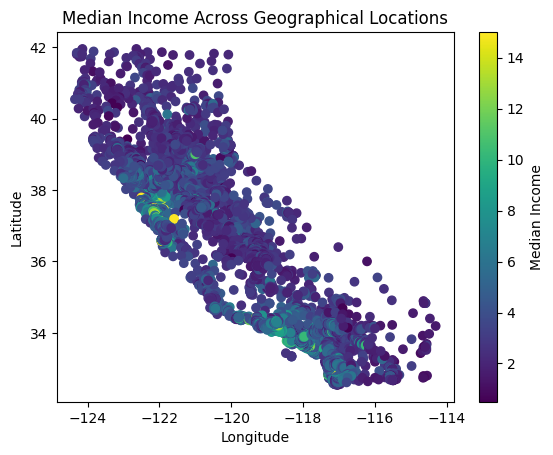

In [13]:
scatter = plt.scatter(x=data_df['Longitude'], y=data_df['Latitude'], c=data_df['MedInc'], cmap='viridis')
plt.title('Median Income Across Geographical Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

colorbar = plt.colorbar(scatter)
colorbar.set_label('Median Income')
plt.show()

### 2.2. Feature scaling

In [14]:
# The 4Geeks provided solution skips this part - but it's important! If one feature has a much larger range than the others, it will be given more importance during distance calculations...
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)

## 3. Clustering

### 3.1. Find clusters

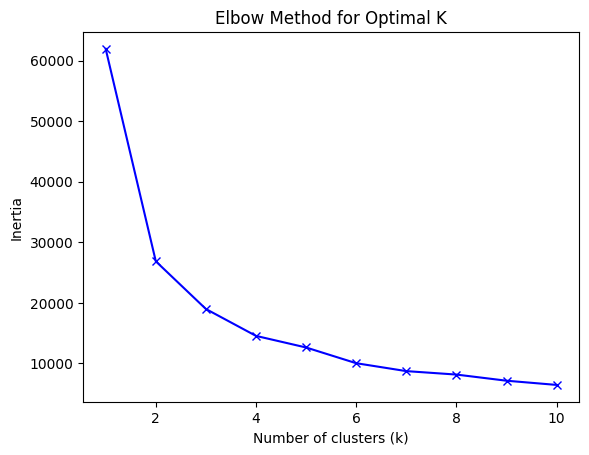

In [15]:
# Use Scikit-learn's KMeans()
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')

plt.show()

### 3.2. Add cluster label to training data

In [16]:
# Add the clusters from the KMeans model as the new label - now we have turned our unsupervised machine learning problem into a supervised one!
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_df['Cluster'] = kmeans.fit_predict(data_scaled)

/tmp/ipykernel_69739/2123401567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Cluster'] = kmeans.fit_predict(data_scaled)


### 3.3. Plot results

In [17]:
# If you scaled the data properly, you should notice that your clusters are much cleaner than the 4Geeks solution - which basically just cuts california in half and then stratifies it by median income because that was the feature with the largest range in values!
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
 3   Cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 564.5 KB


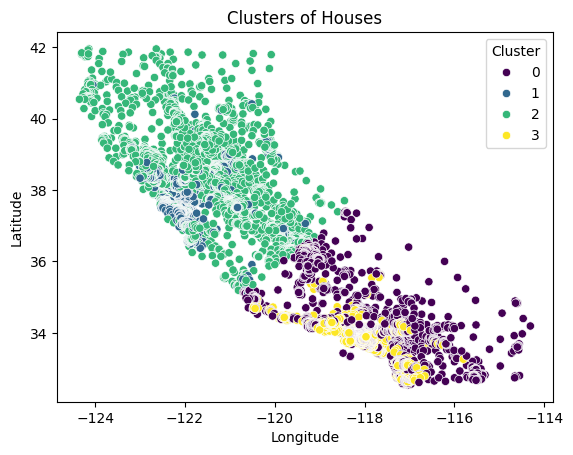

In [18]:
sns.scatterplot(x=data_df['Longitude'], y=data_df['Latitude'], hue=data_df['Cluster'], palette='viridis')
plt.title('Clusters of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## 4. Supervised classification model
### 4.1. Features & labels

In [19]:
# Re-separate the features and labels to train a supervised classifier
X = data_df.drop('Cluster', axis=1)  # Drop Cluster if needed
y = data_df['Cluster']

### 4.2. Model training

In [20]:
# Pick any classification model you like
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X, y)

RandomForestClassifier(random_state=42)

### 4.3. Cross-validation

In [21]:
# You can re-use the 'cross_val' helper function we wrote for the naive bayes project here (look in src/utils.py in my copy of the repo. from the course materials repo. list).
cv_scores = cross_val_score(classifier, X, y, cv=5)
print('Cross-Validation Accuracy:', cv_scores.mean())

Cross-Validation Accuracy: 0.9710271317829458


### 4.4. Model evaluation

In [22]:
# Your code here...
y_pred = classifier.predict(X)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred))

[[8824    0    0    0]
 [   0 2428    0    0]
 [   0    0 6262    0]
 [   0    0    0 3126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8824
           1       1.00      1.00      1.00      2428
           2       1.00      1.00      1.00      6262
           3       1.00      1.00      1.00      3126

    accuracy                           1.00     20640
   macro avg       1.00      1.00      1.00     20640
weighted avg       1.00      1.00      1.00     20640

